## Exercise 10 - Text classification with Tensorflow
- In this exercise you utilize the *DisneylandReviews.csv* located in data_files directory.
- This exercise has the following phases:
    - Load the data from csv file.
    - Create directory structure including sample files from the data you loaded.
    - Train your neural network with the extracted data.
    - Validate the operation of your trained model.
- Use [this example](https://hantt.pages.labranet.jamk.fi/ttc2050-material/material/10-ai-text-classification-tensorflow/) as a reference.

1 Import all the necessary libraries listed in our Tensorflow example. Read the csv file DisneylandReviews.csv into a data structure of your choice (list, dict, json...).

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import csv
import random

from tensorflow.keras import layers, losses, preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
batch_size = 32
validation_split = 0.2
seed = 42
dataset_dir = 'disney_review_data'
max_features = 10000

A = [1,2,3,4,5,6]
B = A[:len(A)//2]
C = A[len(A)//2:]

In [3]:
with open("./data_files/DisneylandReviews.csv") as f:
    reader = csv.reader(f)
    data = list(reader)

data.pop(0)



for i in range(len(data)):
    data[i][1] = int(data[i][1])

random.shuffle(data)
    
traindirdata = data[:int((len(data)+1)*.80)]

testdirdata = data[int((len(data)+1)*.80):]


2 Create the directory structure presented below either by using python's os library or manually. So there should be *disney_review_data* directory which has two subdirectories: *train* and *test*. Both of those directories should then have two subdirectories: *pos* and *neg*.

```
disney_review_data
    |
    |----train
    |      |----pos
    |      |----neg
    |
    |----test
           |----pos
           |----neg
```

In [4]:
os.listdir(dataset_dir)
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

if os.path.exists(os.path.join(train_dir, '.ipynb_checkpoints')):
    remove_dir = os.path.join(train_dir, '.ipynb_checkpoints')
    shutil.rmtree(remove_dir)
    
if os.path.exists(os.path.join(test_dir, '.ipynb_checkpoints')):
    remove_dir = os.path.join(test_dir, '.ipynb_checkpoints')
    shutil.rmtree(remove_dir)

3 Loop through your saved data and save it as text files (.txt) into the directory structure. First 80 % of the data should go into *pos* and *neg* subdirectories under the *train* directory with the following conditions:
- pos = rating is 4 or more
- neg = rating is 2 or less

The last 20 % should go into the *pos* and *neg* subdirectories under the *test* directory using the same conditions as above. Rating value of 3 is considered to be neutral and should not be processed.

In [5]:
for i in range(len(traindirdata)):
    if(traindirdata[i][1] >= 4):
        posf = open("./disney_review_data/train/pos/testfile{}.txt".format(i), "w+")
        posf.write(traindirdata[i][4])
        posf.close()
    elif(data[i][1] <= 2):
        negf = open("./disney_review_data/train/neg/testfile{}.txt".format(i), "w+")
        negf.write(traindirdata[i][4])
        negf.close()
        

In [6]:
for i in range(len(testdirdata)):
    if(testdirdata[i][1] >= 4):
        pos = open("./disney_review_data/test/pos/testfile{}.txt".format(i), "w+")
        pos.write(testdirdata[i][4])
        pos.close()
    elif(testdirdata[i][1] <= 2):
        neg = open("./disney_review_data/test/neg/testfile{}.txt".format(i), "w+")
        neg.write(testdirdata[i][4])
        neg.close()
        

4 Use material page linked above as a reference and implement the text classification example to your notebook. Now modify it so that your Disneyland review data will be read from the directory structure you created earlier. Run the notebook and ensure that no errors are present.

In [7]:
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory('disney_review_data/train', batch_size=batch_size, validation_split=validation_split, subset="training", seed=seed)


Found 30058 files belonging to 2 classes.
Using 24047 files for training.


In [8]:
print(raw_train_ds.class_names)

['neg', 'pos']


In [9]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory('disney_review_data/train', batch_size=batch_size, validation_split=validation_split, subset='validation', seed=seed)

Found 30058 files belonging to 2 classes.
Using 6011 files for validation.


In [10]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory('disney_review_data/test', batch_size=batch_size)


Found 7489 files belonging to 2 classes.


In [11]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,'[%s]' % re.escape(string.punctuation),'')

In [12]:
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=250)

In [13]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [14]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [15]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"Been going to Disneyland for many years, first as a kid and now with my kids. It never gets old. There are a few tricks to making it a great day...try to go mid week for shorter lines. Be there when it opens. We often do 3 or 4 rides by 10 am, and then take a break for coffee. Know where you want to go (study the map) and take advantage of the fastpass. Our favorite rides: Space Mountain, Pirates, Big Thunder. Bring your own water bottles. Bring sunscreen. Take breaks. One nice break is to ride the train around the park   great to do when it is hot outside and everyone is getting tired. When you take a break, just look around. I want the gardening staff from Disney to take care of my house! Every flower and blade of grass is perfect. The buildings all look freshly painted. The employees (mostly) are nice. It is fun to ask them questions   like do you get to pick the ride you work on. Enjoy every detail, that's what makes it special from other amusement parks."
Label 1
Review b

In [16]:
text_batch, label_batch = next(iter(raw_train_ds))
test_review, test_label = text_batch[0], label_batch[0]
print("Review", test_review)
print("Label", raw_train_ds.class_names[test_label])
print("Vectorized review", vectorize_text(test_review, test_label))

Review tf.Tensor(b"I went there two days ago with my daughter (16 y.o) and grandson (6 y.o), they both hated it! There were absolutely no parades or shows, and trust me, I triple checked with staff to see if any were on that day. There were very few rides, the ones that were open weren't available for the younger ones. There were many, many shops which were massively over priced, they defiantly upped the prices (  100 for a cowboy outfit!). The staff, costumed and un costumed were both rude and inactive with my grandson. The only character around was Mickey Mouse and you had to pay to take a picture with him! The food was overpriced and there was only fast food; on top of that I paid to stay at the 5* hotel on the park but they mixed up our reservation so I ended up paying for a more expensive room after waiting an hour. Seriously. Worst holiday ever!", shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  14,   72,   29,  139,  

In [17]:
print("2 ---> ",vectorize_layer.get_vocabulary()[2])
print("7 ---> ",vectorize_layer.get_vocabulary()[7])
print("10 ---> ",vectorize_layer.get_vocabulary()[10])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

2 --->  the
7 --->  we
10 --->  was
Vocabulary size: 10000


In [18]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [19]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, 16),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=tf.metrics.BinaryAccuracy(threshold=0.0))


In [21]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)


Epoch 1/15
752/752 [==============================] - 7s 9ms/step - loss: 0.4546 - binary_accuracy: 0.9032 - val_loss: 0.2859 - val_binary_accuracy: 0.9045
Epoch 2/15
752/752 [==============================] - 6s 9ms/step - loss: 0.2843 - binary_accuracy: 0.9049 - val_loss: 0.2696 - val_binary_accuracy: 0.9045
Epoch 3/15
752/752 [==============================] - 6s 8ms/step - loss: 0.2670 - binary_accuracy: 0.9051 - val_loss: 0.2483 - val_binary_accuracy: 0.9072
Epoch 4/15
752/752 [==============================] - 6s 8ms/step - loss: 0.2407 - binary_accuracy: 0.9102 - val_loss: 0.2221 - val_binary_accuracy: 0.9173
Epoch 5/15
752/752 [==============================] - 7s 9ms/step - loss: 0.2106 - binary_accuracy: 0.9214 - val_loss: 0.1972 - val_binary_accuracy: 0.9240
Epoch 6/15
752/752 [==============================] - 6s 8ms/step - loss: 0.1853 - binary_accuracy: 0.9304 - val_loss: 0.1776 - val_binary_accuracy: 0.9296
Epoch 7/15
752/752 [==============================] - 6s 8ms/ste

In [22]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

235/235 [==============================] - 1s 3ms/step - loss: 0.1138 - binary_accuracy: 0.9565
Loss:  0.11380910128355026
Accuracy:  0.9564694762229919


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

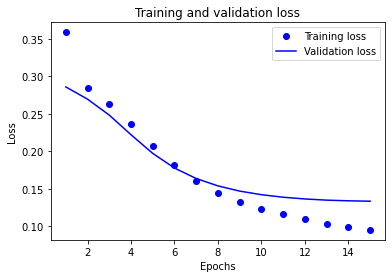

In [24]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

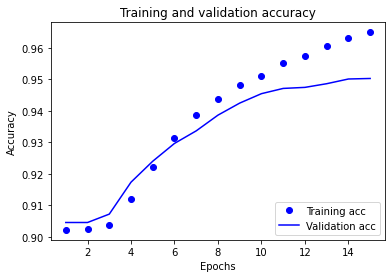

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [26]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

235/235 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9532
0.9564694762229919


5 Create some test data to verify that your model works and present the prediction results here.

In [44]:
examples = [
    "As an almost born and raised SoCal kid, Disneyland has a special place in my heart. They claimthat it is the happiest place on Earth, and I find this cryptic lingo true. Whether their first or hundreds, people who visit here are generally excited to be taking part in this magical kingdom. From Disney-made food to merchandise, guests will splurge like money-made from Monopoly paper. Unfortunately, I am also very guilty of this participation. I ended up walking out with a special edition Disney Starbucks mug, which will sit on the shelves and never be used.",
    "This is a shit place and you should never go there!!! I dont ever want to do anything like going to that rollercoaster ever again!! The place is a joke",
    "I get that the crowding is a thing that has to be addressed, but it still feels a lot like Disney just laughed and ran to the bank after soaking up a whole truckload of money selling way more tickets than it had capacity for - and KNEW it didn't have capacity for - knowing that there's no way to change your mind for that year. It's over and done, and they've gotten their money so they don't care.",
    "I am never going to waste my time in disney land ever again... The lines we re so long that i have never seen anything like it! i had to wait 4 hours to get into a rollercoaster and the rollercoaster really sucked. I will never come again and i won t recommend it to anyone!!"
]

results = export_model.predict(examples)
results

array([[0.9285468 ],
       [0.6200329 ],
       [0.08716184],
       [0.475243  ]], dtype=float32)

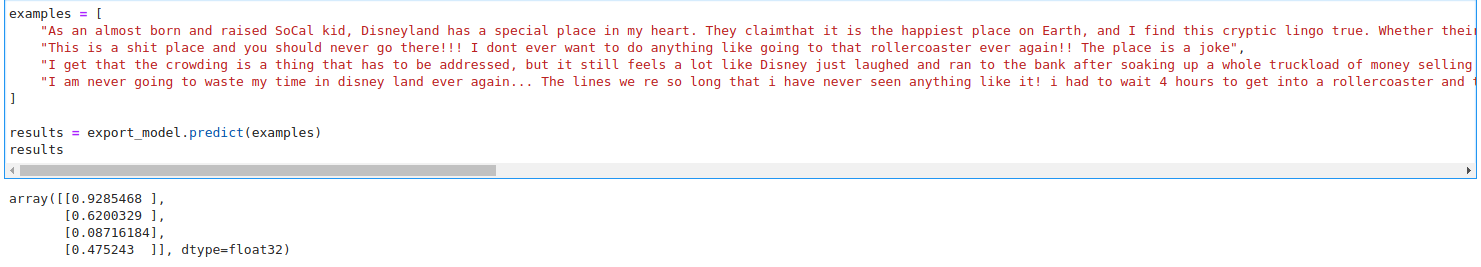